In [335]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fft import fft, ifft
c=3*10**8
def cm(x):
    cm=10**13*(x*3*10**8)**(-1)
    return cm

In [336]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return np.where(array==array[idx])[0]

In [337]:
adres='F:\Github Rep\Femto\OKE_CCl4.dat'
ctetOKE=pd.read_csv(adres,sep=' ')
adres='F:\Github Rep\Femto\OKE_chloroform.dat'
chloroformOKE=pd.read_csv(adres,sep=' ')
adres='F:\Github Rep\Femto\Raman_CCl4.dat'
ctetR=pd.read_csv(adres,sep=' ')
adres='F:\Github Rep\Femto\Raman_chloroform.dat'
chloroformR=pd.read_csv(adres,sep=' ')
k=[ctetOKE,chloroformOKE,ctetR,chloroformR]

In [338]:
ctetOKE

,Delay,-5C,15C,35C,55C,70C
0,-4469.08154,-0.000032,0.000003,0.000038,0.000036,0.000040
1,-4468.08085,-0.000202,0.000061,-0.000005,-0.000150,0.000024
2,-4467.08016,-0.000171,0.000080,0.000000,0.000000,0.000133
3,-4466.07947,-0.000081,0.000019,-0.000032,-0.000042,0.000038
4,-4465.07878,-0.000175,0.000082,0.000066,0.000062,-0.000006
...,...,...,...,...,...,...
23979,19526.46397,0.000194,-0.000120,-0.000029,0.000019,0.000003
23980,19527.46466,0.000108,-0.000129,-0.000087,0.000030,0.000090
23981,19528.46535,0.000063,-0.000097,-0.000072,0.000055,0.000104
23982,19529.46604,-0.000013,-0.000066,-0.000158,0.000046,0.000038


In [339]:
chloroformOKE

,Delay,-5C,15C,35C,55C
0,-4418.04635,0.000056,-0.000068,-0.000063,-0.000123
1,-4417.04566,-0.000066,0.000006,-0.000011,-0.000038
2,-4416.04497,0.000029,0.000127,-0.000065,0.000075
3,-4415.04428,-0.000074,-0.000039,-0.000132,-0.000141
4,-4414.04359,0.000049,0.000071,0.000124,0.000039
...,...,...,...,...,...
23979,19577.49916,0.000142,-0.000062,0.000055,0.000013
23980,19578.49985,0.000237,0.000115,-0.000063,-0.000184
23981,19579.50054,-0.000020,0.000129,0.000025,0.000040
23982,19580.50123,0.000189,-0.000017,-0.000048,-0.000095


In [340]:
ctetR

,Wavenumber,parallel,perpendicular
0,-0.068359,0.104271,0.046003
1,0.413765,0.108359,0.050272
2,0.895889,0.102145,0.051004
3,1.378013,0.084706,0.050378
4,1.860138,0.059426,0.051530
...,...,...,...
7673,3699.271000,0.104958,0.083837
7674,3699.753000,0.108199,0.108962
7675,3700.235000,0.100936,0.126444
7676,3700.718000,0.091021,0.128582


In [341]:
chloroformR

,Wavenumber,parallel,perpendicular
0,-0.068359,0.032550,0.063105
1,0.413765,0.030361,0.075454
2,0.895889,0.033290,0.084148
3,1.378013,0.038888,0.087153
4,1.860138,0.047615,0.083267
...,...,...,...
7673,3699.271000,0.058674,0.044696
7674,3699.753000,0.065455,0.081929
7675,3700.235000,0.056224,0.118976
7676,3700.718000,0.032274,0.149576


In [342]:
dane=[]
n=-1
for i in k:
    n=n+1
    dane.append(n)
    f=[]
    for j in range(len(i.columns)):
        f.append(j)
        f[j]=np.array(i[i.columns[j]].values.tolist())
    dane[n]=f
dane[0]

[array([-4469.08154, -4468.08085, -4467.08016, ..., 19528.46535,
        19529.46604, 19530.46673]),
 array([-3.20e-05, -2.02e-04, -1.71e-04, ...,  6.30e-05, -1.30e-05,
         1.98e-04]),
 array([ 3.00e-06,  6.10e-05,  8.00e-05, ..., -9.70e-05, -6.60e-05,
        -1.58e-04]),
 array([ 3.80e-05, -5.00e-06,  0.00e+00, ..., -7.20e-05, -1.58e-04,
        -3.80e-05]),
 array([ 3.6e-05, -1.5e-04,  0.0e+00, ...,  5.5e-05,  4.6e-05, -7.3e-05]),
 array([4.00e-05, 2.40e-05, 1.33e-04, ..., 1.04e-04, 3.80e-05, 4.10e-05])]

Text(0.5, 0, 'Opóźnienie [fs]')

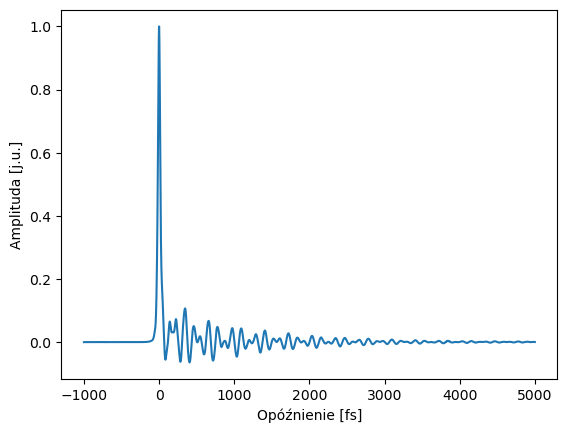

In [343]:
#rys.1
plt.plot(dane[0][0][3467:9463],dane[0][2][3467:9463])
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Opóźnienie [fs]')

Text(0.5, 0, 'Liczba falowa [cm$^{-1}$]')

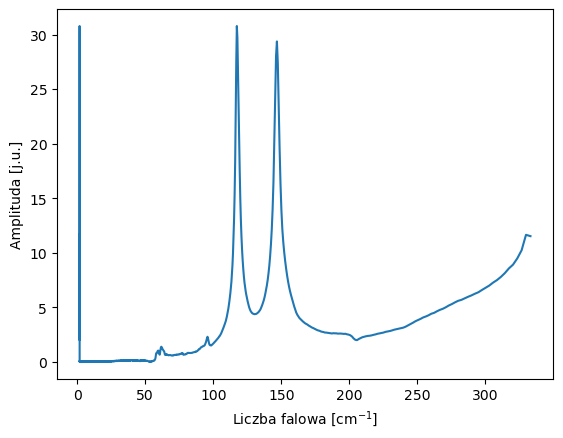

In [344]:
#rys.2
plt.plot(cm(dane[0][0][4566:]),np.abs(np.fft.fft(dane[0][2][4566:])))
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Liczba falowa [cm$^{-1}$]')

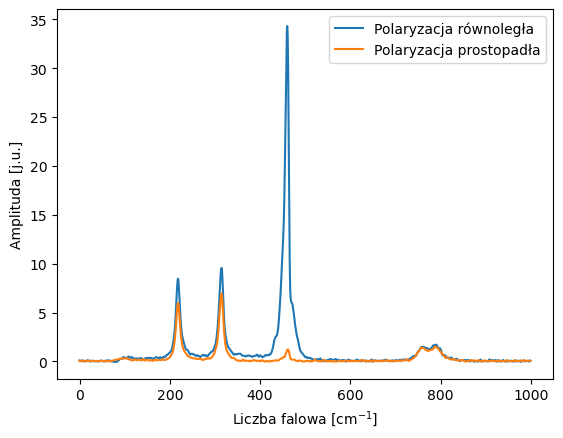

In [345]:
#rys 3
n=find_nearest(dane[2][0],0)[0]
k=find_nearest(dane[2][0],1000)[0]
plt.plot(dane[2][0][n:k],dane[2][1][n:k],label='Polaryzacja równoległa')
plt.plot(dane[2][0][n:k],dane[2][2][n:k],label='Polaryzacja prostopadła')
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Liczba falowa [cm$^{-1}$]')
plt.legend()

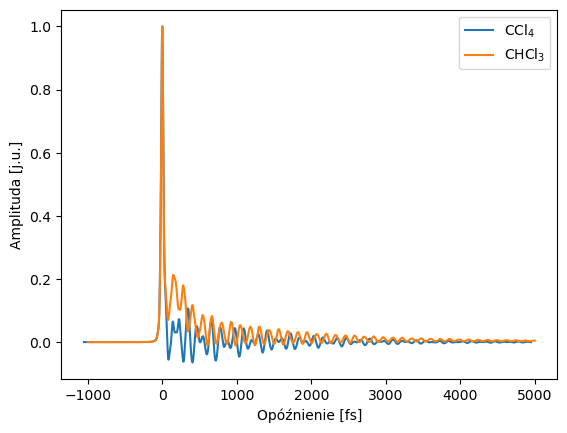

In [346]:
#rys 6
n=find_nearest(dane[1][0],-1000)[0]
k=find_nearest(dane[1][0],5000)[0]
plt.plot(dane[0][0][n:k], dane[0][2][n:k], label='CCl$_4$')
plt.plot(dane[1][0][n:k], dane[1][2][n:k], label='CHCl$_3$')
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Opóźnienie [fs]')
plt.legend()

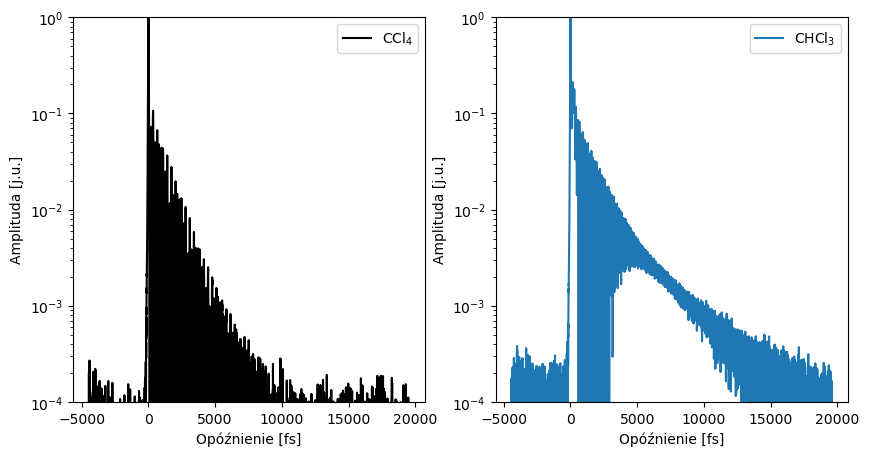

In [366]:
#rys 7
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(dane[0][0], dane[0][2], label='CCl$_4$',color='k')
plt.yscale('log')
plt.ylim([10**(-4),1])
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Opóźnienie [fs]')
plt.legend()

plt.subplot(1,2,2)
plt.plot(dane[1][0], dane[1][2], label='CHCl$_3$')
plt.yscale('log')
plt.ylim([10**(-4),1])

plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Opóźnienie [fs]')
plt.legend()
plt.show()


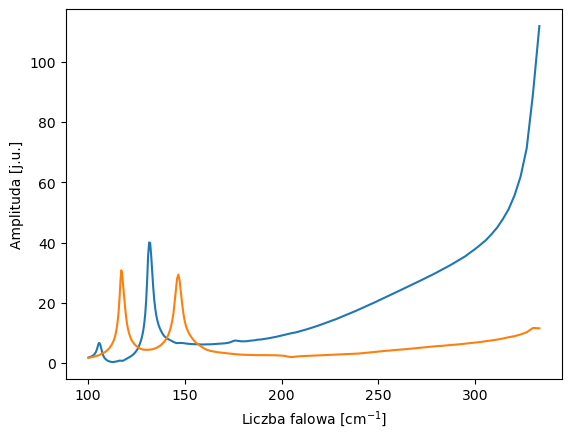

In [368]:
#rys 8
z=find_nearest(dane[1][0],100)[0]
k=find_nearest(cm(dane[1][0][z:]),100)[0]
n=find_nearest(cm(dane[1][0][z:]),1000)[0]
plt.plot(cm(dane[1][0][z:])[n:k], np.abs(np.fft.fft(dane[1][2][z:]))[n:k])
z=find_nearest(dane[0][0],100)[0]
k=find_nearest(cm(dane[0][0][z:]),100)[0]
n=find_nearest(cm(dane[0][0][z:]),1000)[0]
plt.plot(cm(dane[0][0][z:])[n:k], np.abs(np.fft.fft(dane[0][2][z:]))[n:k])
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Liczba falowa [cm$^{-1}$]')
plt.show()

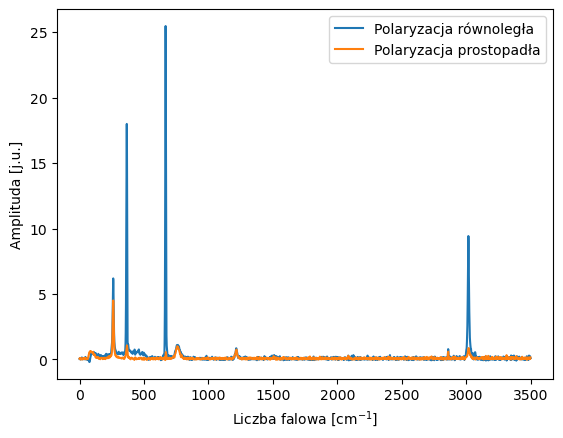

In [349]:
#rys 9
n=find_nearest(dane[3][0],0)[0]
k=find_nearest(dane[3][0],3500)[0]
plt.plot(dane[3][0][n:k],dane[3][1][n:k],label='Polaryzacja równoległa')
plt.plot(dane[3][0][n:k],dane[3][2][n:k],label='Polaryzacja prostopadła')
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Liczba falowa [cm$^{-1}$]')
plt.legend()

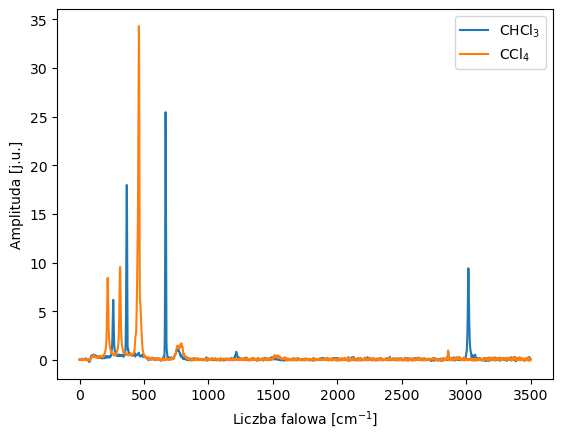

In [350]:
#rys 12
n=find_nearest(dane[3][0],0)[0]
k=find_nearest(dane[3][0],3500)[0]
plt.plot(dane[3][0][n:k],dane[3][1][n:k],label='CHCl$_3$')
n=find_nearest(dane[2][0],0)[0]
k=find_nearest(dane[2][0],3500)[0]
plt.plot(dane[2][0][n:k],dane[2][1][n:k],label='CCl$_4$')
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Liczba falowa [cm$^{-1}$]')
plt.legend()

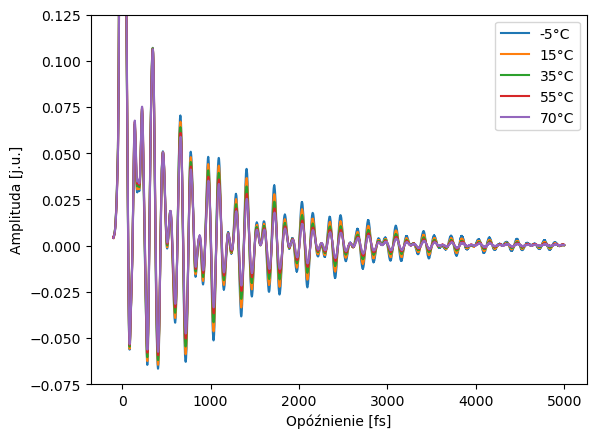

In [367]:
#rys 13
n=find_nearest(dane[0][0],-100)[0]
k=find_nearest(dane[0][0],5000)[0]
lab=['-5','15','35','55','70']
j=-1
for i in dane[0][1:]:
    j=j+1
    plt.plot(dane[0][0][n:k],i[n:k],label=lab[j]+'°C')
plt.ylim([-0.075,0.125])
plt.legend()
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Opóźnienie [fs]')
plt.show()

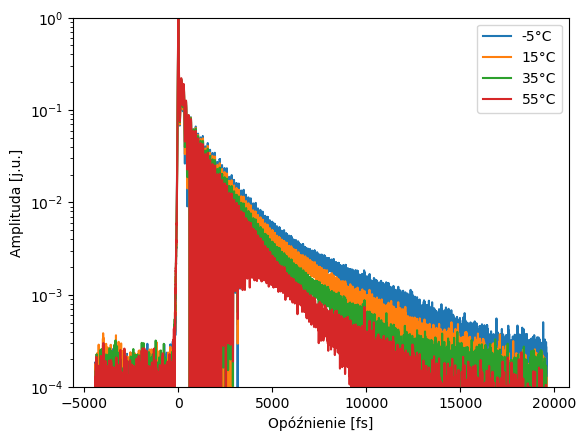

In [352]:
#rys 14
lab=['-5','15','35','55']
j=-1
for i in dane[1][1:]:
    j=j+1
    plt.plot(dane[1][0],i,label=lab[j]+'°C')
plt.yscale('log')
plt.ylim([10**(-4),1])
plt.legend()
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Opóźnienie [fs]')
plt.show()

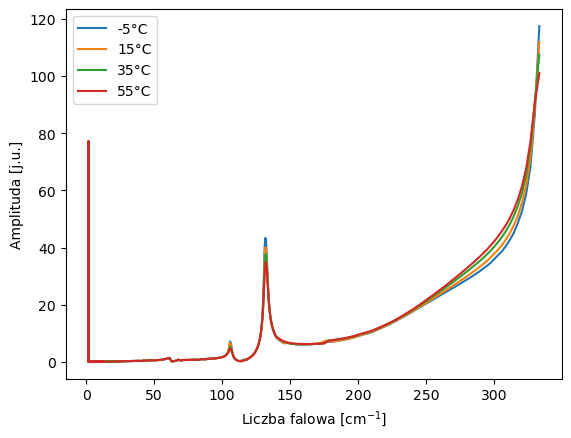

In [374]:
#rys 15
lab=['-5','15','35','55']
j=-1
z=find_nearest(dane[1][0],100)[0]
k=find_nearest(cm(dane[1][0][z:]),0)[0]
n=find_nearest(cm(dane[1][0][z:]),1000)[0]
for i in dane[1][1:]:
    j=j+1 
    plt.plot(cm(dane[1][0][z:])[n:k],np.abs(np.fft.fft(i[z:]))[n:k],label=lab[j]+'°C')
plt.legend()
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Liczba falowa [cm$^{-1}$]')
plt.show()  

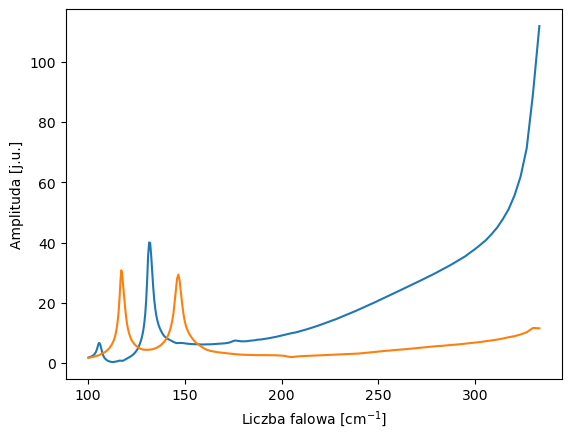

In [369]:
#rys 8
z=find_nearest(dane[1][0],100)[0]
k=find_nearest(cm(dane[1][0][z:]),100)[0]
n=find_nearest(cm(dane[1][0][z:]),1000)[0]
plt.plot(cm(dane[1][0][z:])[n:k], np.abs(np.fft.fft(dane[1][2][z:]))[n:k])
z=find_nearest(dane[0][0],100)[0]
k=find_nearest(cm(dane[0][0][z:]),100)[0]
n=find_nearest(cm(dane[0][0][z:]),1000)[0]
plt.plot(cm(dane[0][0][z:])[n:k], np.abs(np.fft.fft(dane[0][2][z:]))[n:k])
plt.ylabel('Amplituda [j.u.]')
plt.xlabel('Liczba falowa [cm$^{-1}$]')
plt.show()